**Required python libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

**Data Exploration**

Missing Values:
subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64

Summary Statistics:
               age    jitter(%)   shimmer(%)          nhr          hnr  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936     0.006154     0.034035     0.032120    21.679495   
std       8.821524     0.005624     0.025835     0.059692     4.291096   
min      36.000000     0.000830     0.003060     0.000286     1.659000   
25%      58.000000     0.003580     0.019120     0.010955    19.406000   
50%      65.000000     0.004900     0.027510     0.018448    21.92

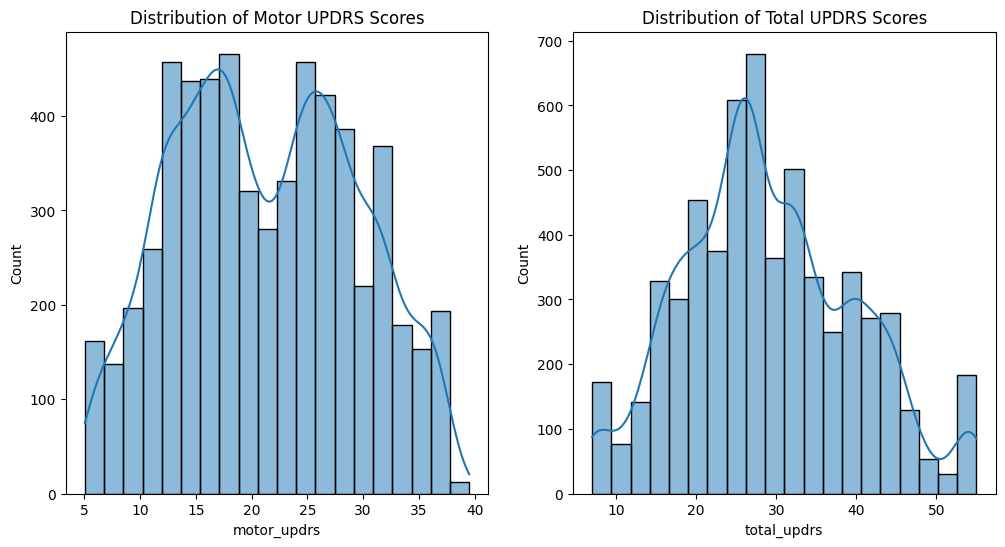

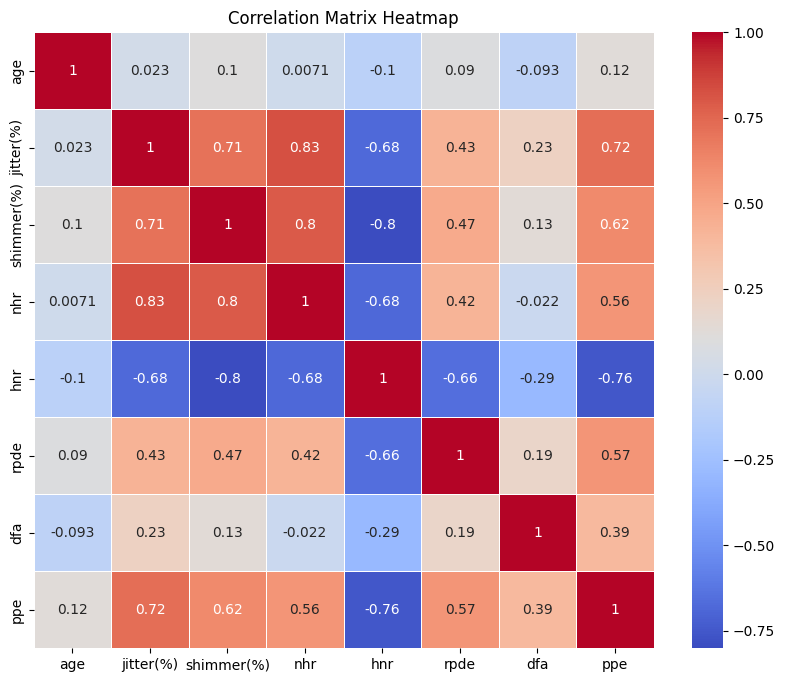

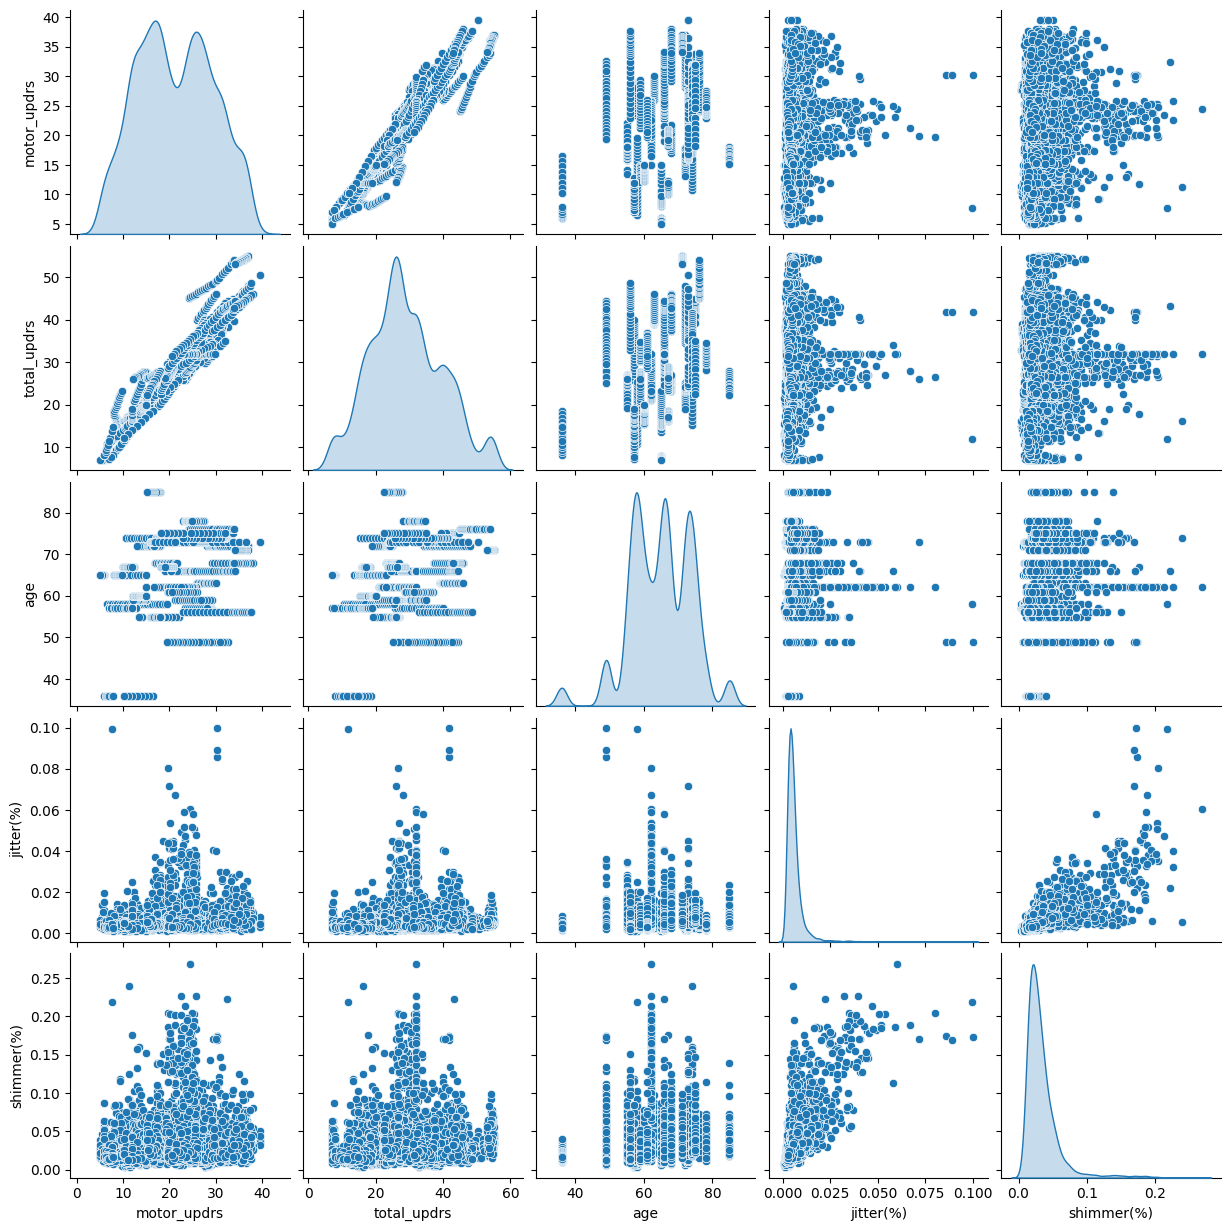

In [2]:
# Loading the sample dataset
data = pd.read_csv('po2_data.csv')

# Initializing data exploration
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Summary statistics for numeric variables
numeric_variables = ['age', 'jitter(%)', 'shimmer(%)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']
summary_statistics = data[numeric_variables].describe()
print("\nSummary Statistics:")
print(summary_statistics)

# Distribution of motor UPDRS and total UPDRS scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['motor_updrs'], bins=20, kde=True)
plt.title('Distribution of Motor UPDRS Scores')

plt.subplot(1, 2, 2)
sns.histplot(data['total_updrs'], bins=20, kde=True)
plt.title('Distribution of Total UPDRS Scores')

# Visualizing relationships between variables
correlation_matrix = data[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

# Pair plots for selected variables
selected_variables = ['motor_updrs', 'total_updrs', 'age', 'jitter(%)', 'shimmer(%)']
sns.pairplot(data[selected_variables], diag_kind='kde')
plt.show()


**Data Preprocessing**

In [3]:
# Handling missing data
data.dropna(inplace=True)  # Remove rows with missing values

# Encoding categorical variables (if necessary)
# In this dataset, 'sex' is already encoded (0 for male, 1 for female)

# Standardizing numeric features (optional but recommended for some models)
numeric_variables = ['age', 'jitter(%)', 'shimmer(%)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']
scaler = StandardScaler()
data[numeric_variables] = scaler.fit_transform(data[numeric_variables])

# Checking the preprocessed dataset
print("Preprocessed Data:")
print(data.head())

Preprocessed Data:
   subject#       age  sex  test_time  motor_updrs  total_updrs  jitter(%)  \
0         1  0.815695    0     5.6431       28.199       34.398   0.082905   
1         1  0.815695    0    12.6660       28.447       34.894  -0.560793   
2         1  0.815695    0    19.6810       28.695       35.389  -0.238944   
3         1  0.815695    0    25.6470       28.905       35.810  -0.155370   
4         1  0.815695    0    33.6420       29.187       36.375  -0.498557   

   jitter(abs)  jitter(rap)  jitter(ppq5)  ...  shimmer(abs)  shimmer(apq3)  \
0     0.000034      0.00401       0.00317  ...         0.230        0.01438   
1     0.000017      0.00132       0.00150  ...         0.179        0.00994   
2     0.000025      0.00205       0.00208  ...         0.181        0.00734   
3     0.000027      0.00191       0.00264  ...         0.327        0.01106   
4     0.000020      0.00093       0.00130  ...         0.176        0.00679   

   shimmer(apq5)  shimmer(apq11)  shi

**Data Visualization**

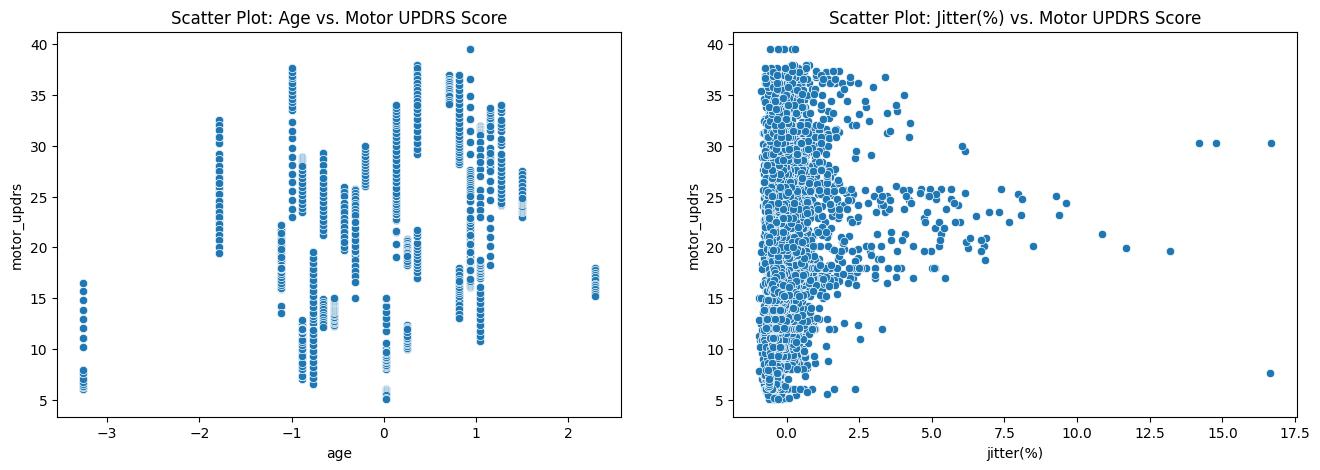

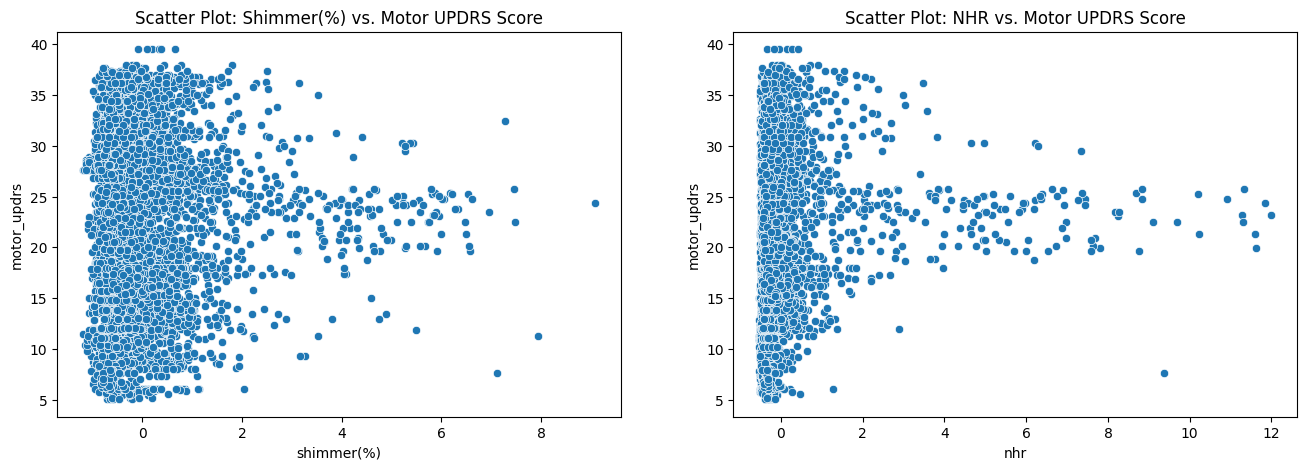

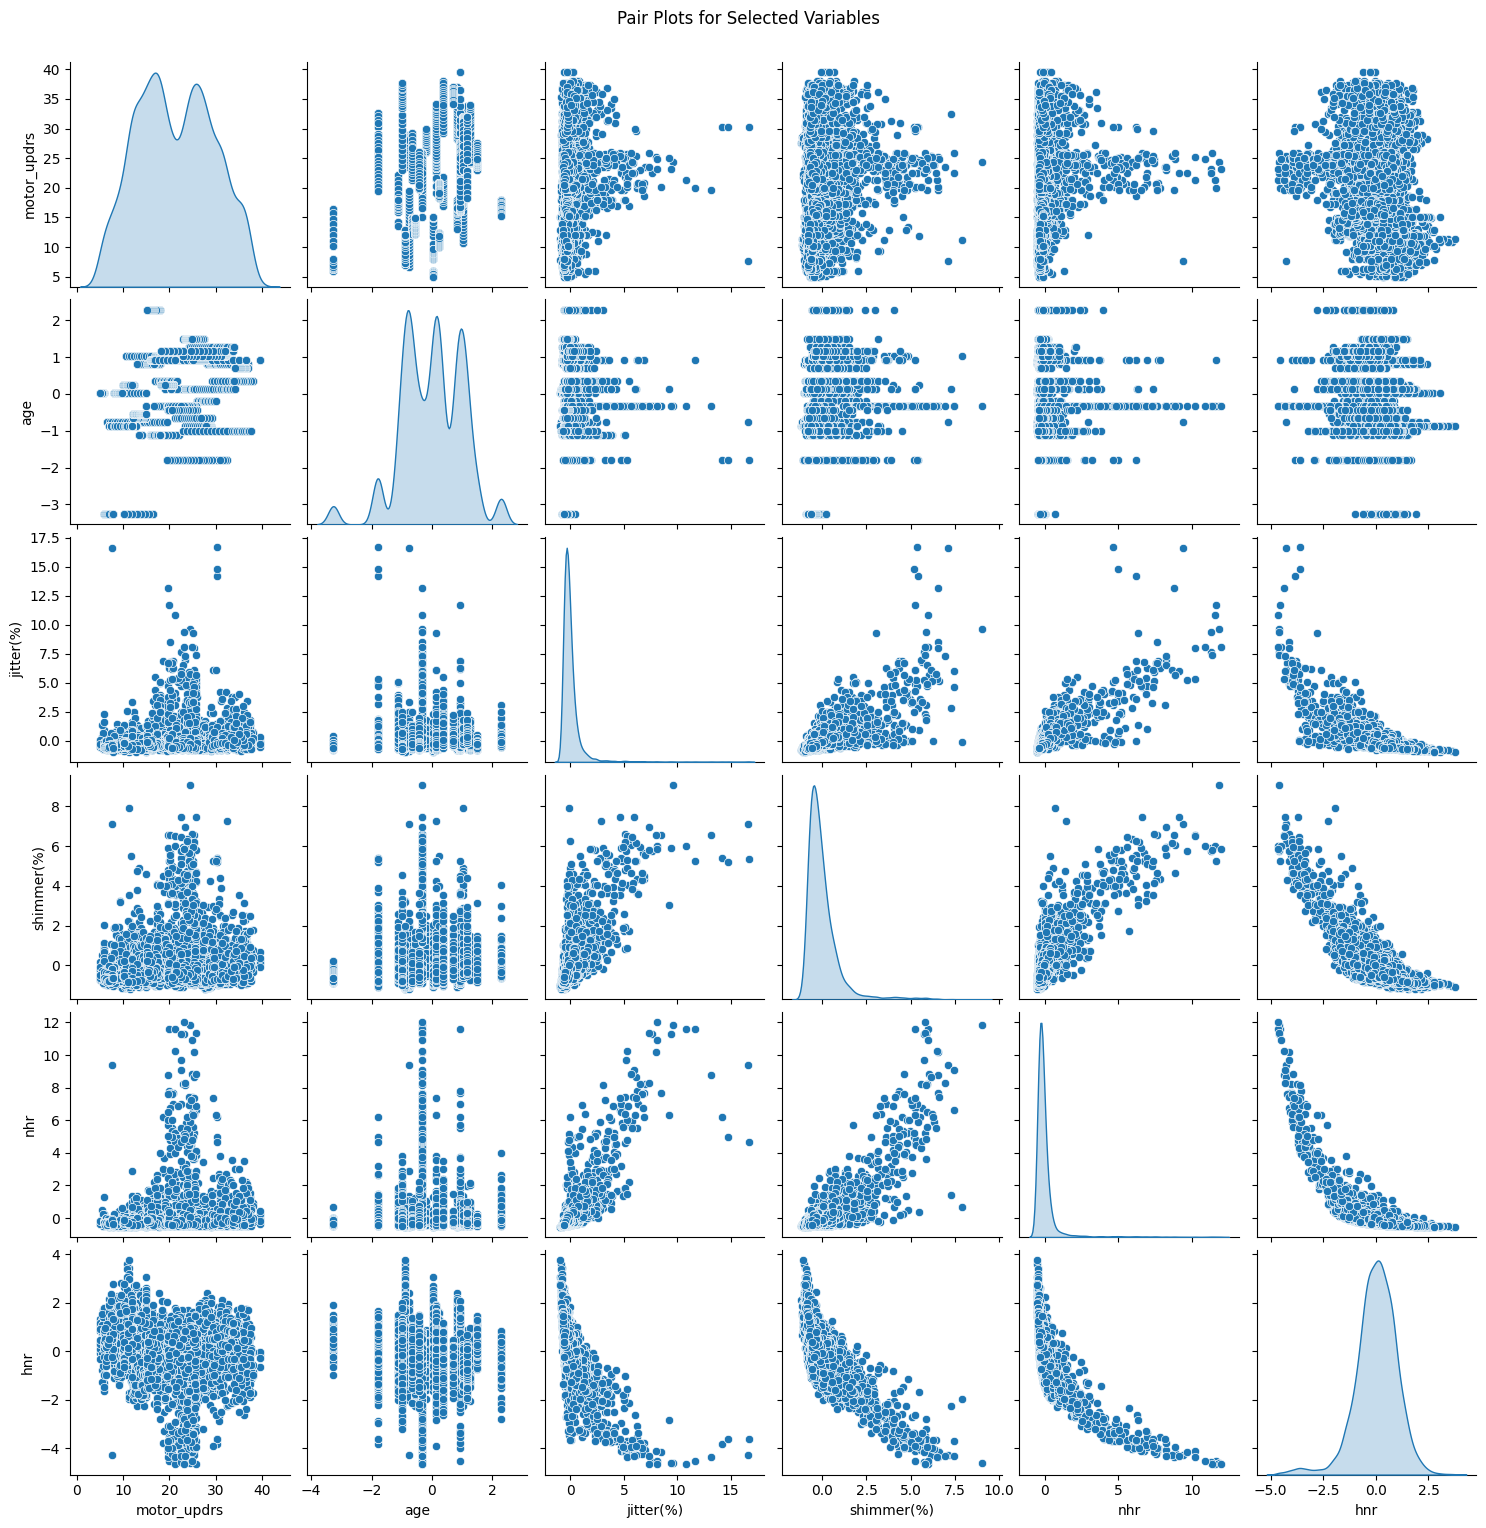

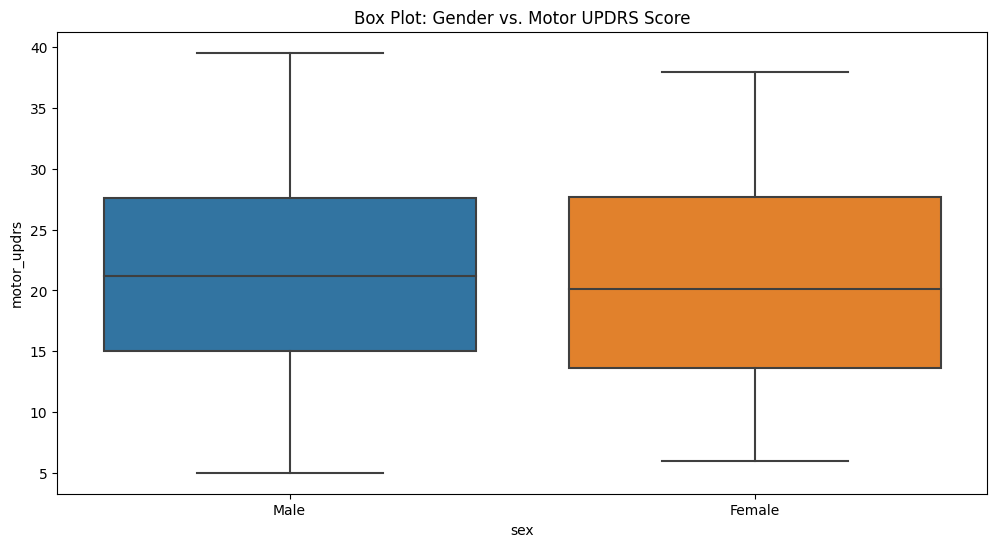

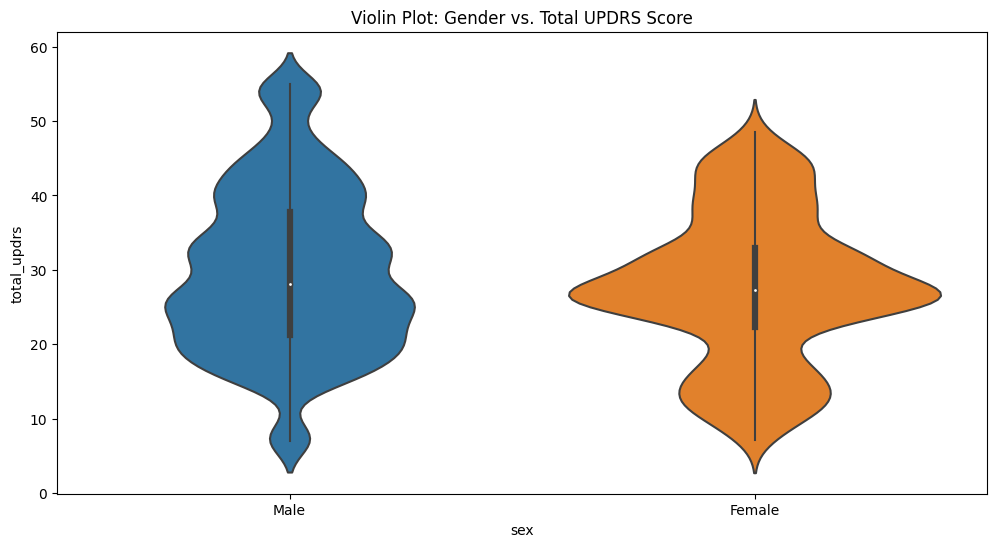

In [4]:
# Scatter plots between selected features and motor UPDRS score
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='motor_updrs', data=data)
plt.title('Scatter Plot: Age vs. Motor UPDRS Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='jitter(%)', y='motor_updrs', data=data)
plt.title('Scatter Plot: Jitter(%) vs. Motor UPDRS Score')

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='shimmer(%)', y='motor_updrs', data=data)
plt.title('Scatter Plot: Shimmer(%) vs. Motor UPDRS Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='nhr', y='motor_updrs', data=data)
plt.title('Scatter Plot: NHR vs. Motor UPDRS Score')

# Pair plots for selected features and UPDRS scores
selected_variables = ['motor_updrs', 'age', 'jitter(%)', 'shimmer(%)', 'nhr', 'hnr']
sns.pairplot(data[selected_variables], diag_kind='kde')
plt.suptitle("Pair Plots for Selected Variables", y=1.02)
plt.show()

# Box plots to visualize gender-based differences in motor UPDRS scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='motor_updrs', data=data)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Box Plot: Gender vs. Motor UPDRS Score')
plt.show()

# Violin plots to visualize gender-based differences in total UPDRS scores
plt.figure(figsize=(12, 6))
sns.violinplot(x='sex', y='total_updrs', data=data)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Violin Plot: Gender vs. Total UPDRS Score')
plt.show()


**Manual Feature Selection**

In [5]:
# Selecting features (predictors) and target variables
features = ['age', 'jitter(%)', 'shimmer(%)', 'nhr', 'hnr']
target_motor = 'motor_updrs'
target_total = 'total_updrs'

X = data[features]
y_motor = data[target_motor]
y_total = data[target_total]


**Linear Regression Modeling**

In [6]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train_motor, y_test_motor = train_test_split(X, y_motor, test_size=0.2, random_state=42)
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)

# Training linear regression models for motor UPDRS and total UPDRS separately
model_motor = LinearRegression()
model_total = LinearRegression()

model_motor.fit(X_train, y_train_motor)
model_total.fit(X_train, y_train_total)

# Predictions on the test set
y_pred_motor = model_motor.predict(X_test)
y_pred_total = model_total.predict(X_test)

# Evaluating model performance
mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
r2_motor = r2_score(y_test_motor, y_pred_motor)

mse_total = mean_squared_error(y_test_total, y_pred_total)
r2_total = r2_score(y_test_total, y_pred_total)

print("Model Performance - Motor UPDRS:")
print(f"Mean Squared Error (MSE): {mse_motor}")
print(f"R-squared (R^2): {r2_motor}")

print("\nModel Performance - Total UPDRS:")
print(f"Mean Squared Error (MSE): {mse_total}")
print(f"R-squared (R^2): {r2_total}")


Model Performance - Motor UPDRS:
Mean Squared Error (MSE): 59.36835145013605
R-squared (R^2): 0.06988764732095598

Model Performance - Total UPDRS:
Mean Squared Error (MSE): 99.17178246562592
R-squared (R^2): 0.1050531643787126


**Model Interpretation**

In [7]:
# Training linear regression models for motor UPDRS and total UPDRS separately
model_motor = LinearRegression()
model_total = LinearRegression()

model_motor.fit(X, y_motor)
model_total.fit(X, y_total)

# Interpreting coefficients for motor UPDRS model
coefficients_motor = model_motor.coef_
intercept_motor = model_motor.intercept_

print("Interpretation - Motor UPDRS Model:")
for i, feature in enumerate(features):
    print(f"{feature}: {coefficients_motor[i]}")

print(f"Intercept: {intercept_motor}")

# Interpreting coefficients for total UPDRS model
coefficients_total = model_total.coef_
intercept_total = model_total.intercept_

print("\nInterpretation - Total UPDRS Model:")
for i, feature in enumerate(features):
    print(f"{feature}: {coefficients_total[i]}")

print(f"Intercept: {intercept_total}")


Interpretation - Motor UPDRS Model:
age: 2.1321099187314685
jitter(%): 0.053329618137043844
shimmer(%): -0.6977698926888654
nhr: 0.04964681845953144
hnr: -1.5421036193256121
Intercept: 21.29622854468085

Interpretation - Total UPDRS Model:
age: 3.193339418592233
jitter(%): 0.0009216808568695001
shimmer(%): -1.2651975308695695
nhr: -0.03155349652195243
hnr: -2.4346748612992872
Intercept: 29.01894228085106


**Model Validation and Fine-Tuning**

In [8]:
# Initializing linear regression models
model_motor = LinearRegression()
model_total = LinearRegression()

# Performing cross-validation for motor UPDRS model
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # Defining a custom scorer for cross-validation
cross_val_scores_motor = -cross_val_score(model_motor, X, y_motor, cv=5, scoring=mse_scorer)  # Using 5-fold cross-validation

# Performing cross-validation for total UPDRS model
cross_val_scores_total = -cross_val_score(model_total, X, y_total, cv=5, scoring=mse_scorer)  # Using 5-fold cross-validation

# Calculating the mean cross-validation scores
mean_cv_score_motor = cross_val_scores_motor.mean()
mean_cv_score_total = cross_val_scores_total.mean()

print("Cross-Validation Mean MSE - Motor UPDRS Model:", mean_cv_score_motor)
print("Cross-Validation Mean MSE - Total UPDRS Model:", mean_cv_score_total)

Cross-Validation Mean MSE - Motor UPDRS Model: 71.41867996416943
Cross-Validation Mean MSE - Total UPDRS Model: 118.3560700577248


**Predictive Model Validation Using po1_data.txt**

In [10]:
import pandas as pd
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Accessing the txt file
with open("po1_data.txt", "r") as f:
  f = f.readlines()

# Arranging the data into lists of list to create a datafram
nested_list = [line.split(',') for line in f]
nested_list = [[float(item) if '.' in item else int(item) for item in row] for row in nested_list]

# Names of the dataframe columns
columns = [
    "Subject Identifier",
    "Jitter (1)", "Jitter (2)", "Jitter (3)", "Jitter (4)", "Jitter (5)",
    "Shimmer (1)","Shimmer (2)", "Shimmer (3)", "Shimmer (4)", "Shimmer (5)", "Shimmer (6)",
    "Harmonicity (1)", "Harmonicity (2)",  "Harmonicity (3)",
    "Pitch (1)", "Pitch (2)", "Pitch (3)", "Pitch (4)", "Pitch (5)",
    "Pulse (1)","Pulse (2)", "Pulse (3)", "Pulse (4)",
     "Voice (1)","Voice (2)", "Voice (3)", "UPDRS",
    "PD Indicator"
]

df = pd.DataFrame(nested_list, columns=columns)

print(df.head())

   Subject Identifier  Jitter (1)  Jitter (2)  Jitter (3)  Jitter (4)  \
0                   1       1.488    0.000090       0.900       0.794   
1                   1       0.728    0.000038       0.353       0.376   
2                   1       1.220    0.000074       0.732       0.670   
3                   1       2.502    0.000123       1.156       1.634   
4                   1       3.509    0.000167       1.715       1.539   

   Jitter (5)  Shimmer (1)  Shimmer (2)  Shimmer (3)  Shimmer (4)  ...  \
0       2.699        8.334        0.779        4.517        4.609  ...   
1       1.059        5.864        0.642        2.058        3.180  ...   
2       2.196        8.719        0.875        4.347        5.166  ...   
3       3.469       13.513        1.273        5.263        8.771  ...   
4       5.145        9.112        1.040        3.102        4.927  ...   

   Pitch (5)  Pulse (1)  Pulse (2)  Pulse (3)  Pulse (4)  Voice (1)  \
0    187.576        160        159   0.006065

In [11]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and target variable (y)
X = df.drop(['UPDRS'], axis=1)  # Excluding the UPDRS column as it's the target variable
y = df['UPDRS']

# Spliting the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 102.19006486012184
R-squared (R2): 0.5811876239903461


In [13]:
from sklearn.model_selection import cross_val_score, KFold

# Initializing k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and calculate the mean R-squared score
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mean_cv_r2 = cv_scores.mean()

print(f'Mean Cross-Validation R-squared: {mean_cv_r2}')


Mean Cross-Validation R-squared: 0.5934663507006424


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the testing data
y_rf_pred = rf_model.predict(X_test)

# Evaluating the Random Forest model (calculate MSE and R-squared)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest Mean Squared Error (MSE): {rf_mse}')
print(f'Random Forest R-squared (R2): {rf_r2}')


Random Forest Mean Squared Error (MSE): 8.10955721153846
Random Forest R-squared (R2): 0.9667640594141942
